<a href="https://colab.research.google.com/github/marssihsaan/machine-learning/blob/main/Music_Recomendation_Analysis_and_Development%20System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from tqdm import tqdm
sns.set()

data = pd.read_csv("spotify.csv")
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [ ]:
# Eksplor data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

In [ ]:
data.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [ ]:
# drop beberapa kolom

df = data.drop(columns=['id', 'name', 'artists', 'release_date', 'year'])

<Axes: >

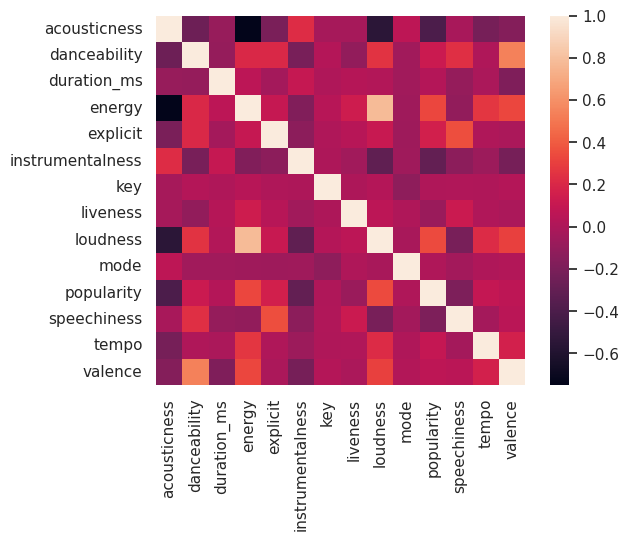

In [ ]:
# membuat plot

cor=df.corr()
sns.heatmap(cor, square = True)

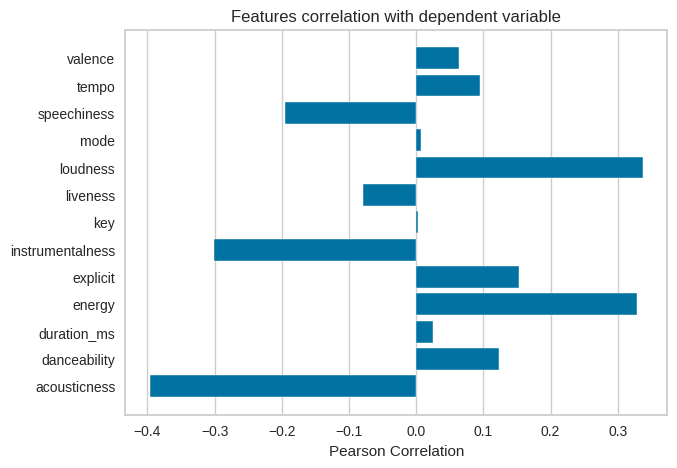

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [ ]:
# membaca data dengan visualizer blue

from yellowbrick.target import FeatureCorrelation

feature_names = ['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence']
X, y = df[feature_names], data['popularity']

# Create a list of the feature names
features = np.array(feature_names)

visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(7,5)
visualizer.fit(X, y)
visualizer.show()

In [ ]:
# normalisasi data

from sklearn.preprocessing import MinMaxScaler
datatypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
normarization = data.select_dtypes(include=datatypes)
for col in normarization.columns:
    MinMaxScaler(col)

In [ ]:
x=normarization.values
x

array([[9.91000e-01, 5.98000e-01, 1.68333e+05, ..., 1.49976e+02,
        6.34000e-01, 1.92000e+03],
       [6.43000e-01, 8.52000e-01, 1.50200e+05, ..., 8.68890e+01,
        9.50000e-01, 1.92000e+03],
       [9.93000e-01, 6.47000e-01, 1.63827e+05, ..., 9.76000e+01,
        6.89000e-01, 1.92000e+03],
       ...,
       [8.06000e-01, 6.71000e-01, 2.18147e+05, ..., 1.08058e+02,
        7.14000e-01, 2.02000e+03],
       [9.20000e-01, 4.62000e-01, 2.44000e+05, ..., 1.71319e+02,
        3.20000e-01, 2.02100e+03],
       [2.39000e-01, 6.77000e-01, 1.97710e+05, ..., 1.12208e+02,
        7.47000e-01, 2.02000e+03]])

In [ ]:
# K-mean clustering
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'WCSS')

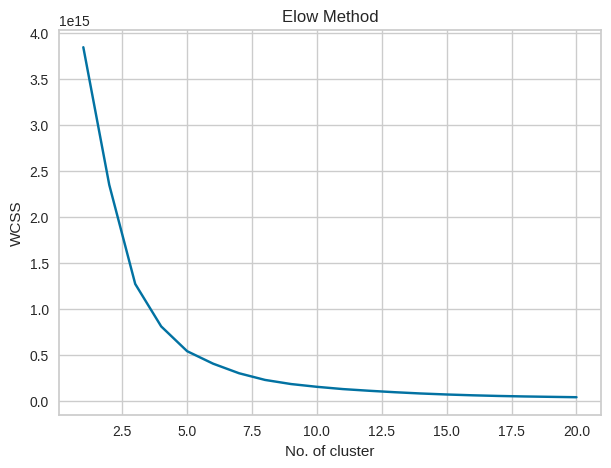

In [ ]:
n=[]
for i in range(1, 21):
    kmean=KMeans(n_clusters=i, random_state=0)
    kmean.fit(x)
    n.append(kmean.inertia_)
plt.plot(range(1, 21), n)
plt.title("Elow Method")
plt.xlabel("No. of cluster")
plt.ylabel("WCSS")

In [ ]:
kmeans = KMeans(n_clusters=5)
features = kmeans.fit_predict(x)
features

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, ..., 0, 0, 2], dtype=int32)

In [ ]:
print(features.max())
print(features.min())

4
0


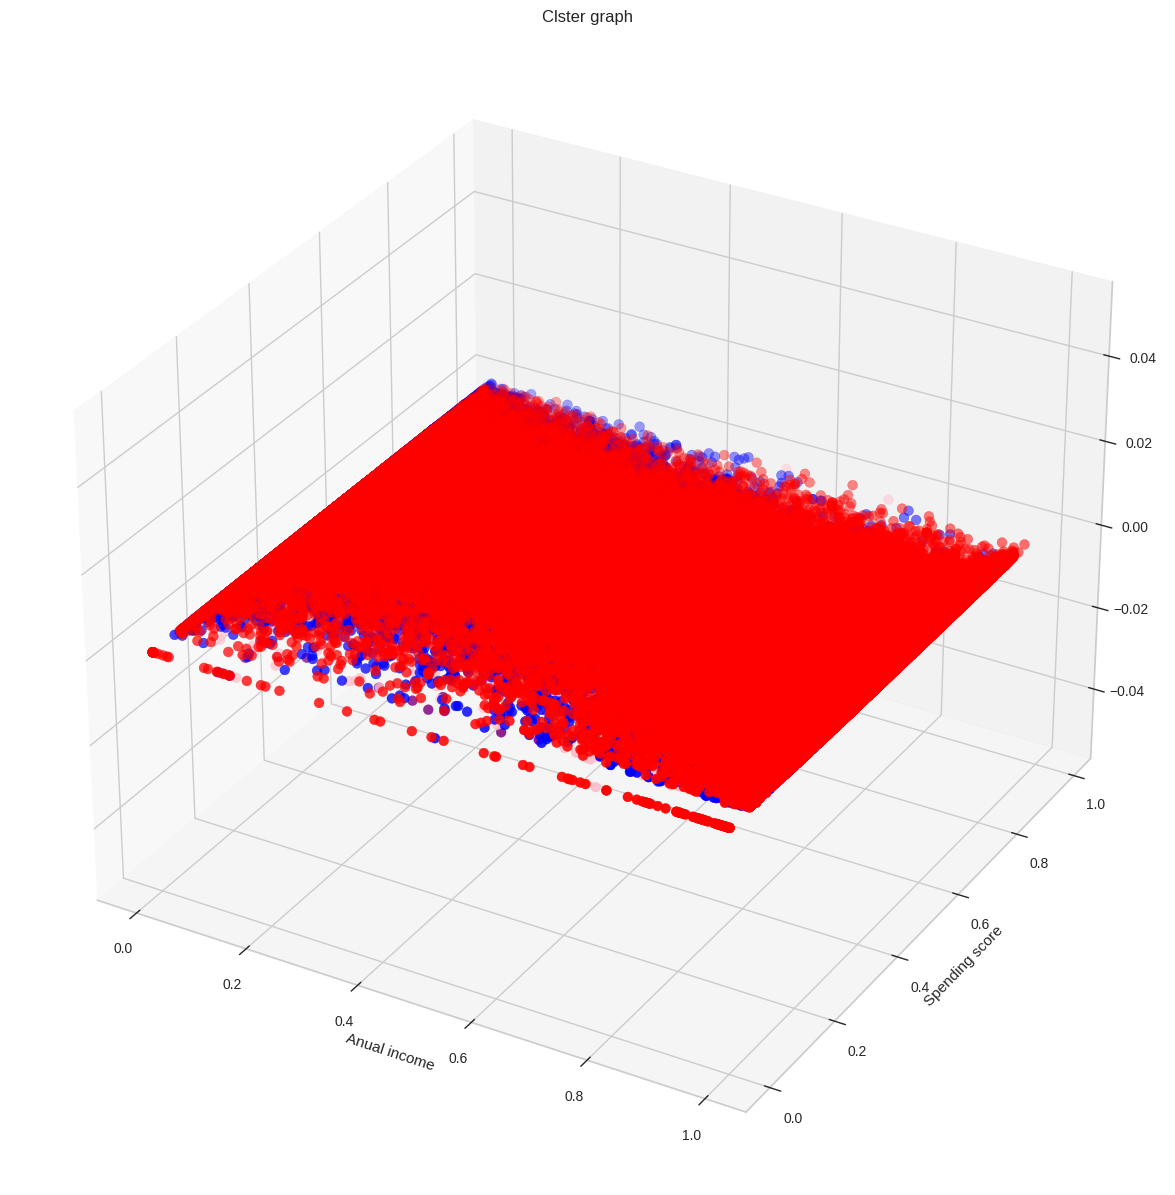

In [ ]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

plt.scatter(x[features == 0,0], x[features == 0,1], s=50, c='blue', label='C1')
plt.scatter(x[features == 1,0], x[features == 1,1], s=50, c='purple', label='C2')
plt.scatter(x[features == 2,0], x[features == 2,1], s=50, c='red', label='C3')
plt.scatter(x[features == 3,0], x[features == 3,1], s=50, c='green', label='C4')
plt.scatter(x[features == 4,0], x[features == 4,1], s=50, c='pink', label='C5')

# ploting cenroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label='Cen')

plt.title("Clster graph")
plt.xlabel("Anual income")
plt.ylabel("Spending score")
# plt.legend()
plt.show()

In [ ]:
data['features'] = features
MinMaxScaler(data['features'])

MinMaxScaler(feature_range=0         2
1         2
2         2
3         4
4         2
         ..
174384    2
174385    2
174386    0
174387    0
174388    2
Name: features, Length: 174389, dtype: int32)

In [ ]:
# membuat sistem rekomendasi dengan 5 lagu runtutan kebawah

class Spotify_Recommendation():
    def __init__(self, dataset):
        self.dataset = dataset
    def recommend(self, songs, amount=1):
        distance = []
        song = self.dataset[(self.dataset.name.str.lower()
        == songs.lower())].head(1).values[0]
        rec = self.dataset[self.dataset.name.str.lower() != songs.lower()]
        for songs in tqdm(rec.values):
            d = 0
            for col in np.arange(len(rec.columns)):
                if not col in [1, 6, 12, 14, 18]:
                    d = d + np.absolute(float(song[col]) - float(songs[col]))
            distance.append(d)
        rec['distance'] = distance
        rec = rec.sort_values('distance')
        columns = ['artists', 'name']
        return rec[columns][:amount]

recommendations = Spotify_Recommendation(data)
recommendations.recommend("Gravity", 5)

100%|██████████| 174385/174385 [00:11<00:00, 14579.84it/s]
<ipython-input-22-f38bacbb5e1f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rec['distance'] = distance


,artists,name
141833,['Caos'],La Planta
74494,"['Twista', 'Erika Shevon']",Wetter (Calling You Daddy)
11852,['Bee Gees'],(Our Love) Don't Throw It All Away
38080,['Nico & Vinz'],Am I Wrong
168600,['Rush'],Leave That Thing Alone - 2004 Remaster
